Providing a dataset of employees working in ABC company. It consists of 458 rows and 9 columns. 
The company needs the detailed report and explanation of their employees in each team, also need to identify the following:
1.How many are there in each Team and the percentage splitting with respect to the total employees.
2.Segregate the employees w.r.t different positions.
3.Find from which age group most of the employees belong to.
4.Find out under which team and position, spending in terms of salary is high.
5.Find if there is any correlation between age and salary , represent it visually.
Before doing the above questions, perform pre processing of the dataset.
Also, the column height is having incorrect data, changing the data of that particular column with any random numbers between 150 and 180.

### Importing necessary modules

In [176]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [177]:
df=pd.read_excel('employee_data.xlsx')

In [178]:
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,2023-02-06 00:00:00,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,2023-06-06 00:00:00,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,2023-05-06 00:00:00,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,2023-05-06 00:00:00,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,2023-10-06 00:00:00,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,2023-03-06 00:00:00,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,2023-01-06 00:00:00,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,2023-03-07 00:00:00,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0


In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      458 non-null    object 
 1   Team      458 non-null    object 
 2   Number    458 non-null    int64  
 3   Position  458 non-null    object 
 4   Age       458 non-null    int64  
 5   Height    458 non-null    object 
 6   Weight    458 non-null    int64  
 7   College   374 non-null    object 
 8   Salary    447 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 32.3+ KB


In [180]:
df.Height

0      2023-02-06 00:00:00
1      2023-06-06 00:00:00
2      2023-05-06 00:00:00
3      2023-05-06 00:00:00
4      2023-10-06 00:00:00
              ...         
453    2023-03-06 00:00:00
454    2023-01-06 00:00:00
455    2023-03-07 00:00:00
456                    7-0
457    2023-03-07 00:00:00
Name: Height, Length: 458, dtype: object

###  changing the data of column Height with any random numbers between 150 and 180.

In [181]:
df.Height=np.random.randint(150,181,size=len(df))

In [182]:
df.Height

0      158
1      154
2      162
3      151
4      175
      ... 
453    171
454    164
455    153
456    170
457    152
Name: Height, Length: 458, dtype: int32

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      458 non-null    object 
 1   Team      458 non-null    object 
 2   Number    458 non-null    int64  
 3   Position  458 non-null    object 
 4   Age       458 non-null    int64  
 5   Height    458 non-null    int32  
 6   Weight    458 non-null    int64  
 7   College   374 non-null    object 
 8   Salary    447 non-null    float64
dtypes: float64(1), int32(1), int64(3), object(4)
memory usage: 30.5+ KB


### Dropping the rows with null values

In [184]:
df.dropna(inplace=True)

In [25]:
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,170,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,164,235,Marquette,6796117.0
3,R.J. Hunter,Boston Celtics,28,SG,22,151,185,Georgia State,1148640.0
6,Jordan Mickey,Boston Celtics,55,PF,21,150,235,LSU,1170960.0
7,Kelly Olynyk,Boston Celtics,41,C,25,174,238,Gonzaga,2165160.0
...,...,...,...,...,...,...,...,...,...
451,Chris Johnson,Utah Jazz,23,SF,26,168,206,Dayton,981348.0
452,Trey Lyles,Utah Jazz,41,PF,20,162,234,Kentucky,2239800.0
453,Shelvin Mack,Utah Jazz,8,PG,26,166,203,Butler,2433333.0
456,Jeff Withey,Utah Jazz,24,C,26,171,231,Kansas,947276.0


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      365 non-null    object 
 1   Team      365 non-null    object 
 2   Number    365 non-null    int64  
 3   Position  365 non-null    object 
 4   Age       365 non-null    int64  
 5   Height    365 non-null    int32  
 6   Weight    365 non-null    int64  
 7   College   365 non-null    object 
 8   Salary    365 non-null    float64
dtypes: float64(1), int32(1), int64(3), object(4)
memory usage: 27.1+ KB


### 1.How many are there in each Team and the percentage splitting with respect to the total employees.

In [186]:
df.Team.value_counts()

Team
New Orleans Pelicans      16
Portland Trail Blazers    15
Detroit Pistons           15
Milwaukee Bucks           14
Philadelphia 76ers        14
Oklahoma City Thunder     14
Los Angeles Clippers      14
Washington Wizards        13
Charlotte Hornets         13
Phoenix Suns              13
Sacramento Kings          13
Memphis Grizzlies         13
Brooklyn Nets             13
Boston Celtics            12
Dallas Mavericks          12
Indiana Pacers            12
Chicago Bulls             12
Los Angeles Lakers        12
Golden State Warriors     12
Houston Rockets           11
Cleveland Cavaliers       11
San Antonio Spurs         11
Atlanta Hawks             11
New York Knicks           11
Utah Jazz                 11
Miami Heat                10
Orlando Magic             10
Toronto Raptors           10
Denver Nuggets             9
Minnesota Timberwolves     8
Name: count, dtype: int64

In [187]:
df.Team.value_counts().sum()  #total employees

365

#### Each Team and the percentage splitting with respect to the total employees.

In [188]:
percentage_splitting=round((df.Team.value_counts()/len(df))*100,2)
percentage_splitting

Team
New Orleans Pelicans      4.38
Portland Trail Blazers    4.11
Detroit Pistons           4.11
Milwaukee Bucks           3.84
Philadelphia 76ers        3.84
Oklahoma City Thunder     3.84
Los Angeles Clippers      3.84
Washington Wizards        3.56
Charlotte Hornets         3.56
Phoenix Suns              3.56
Sacramento Kings          3.56
Memphis Grizzlies         3.56
Brooklyn Nets             3.56
Boston Celtics            3.29
Dallas Mavericks          3.29
Indiana Pacers            3.29
Chicago Bulls             3.29
Los Angeles Lakers        3.29
Golden State Warriors     3.29
Houston Rockets           3.01
Cleveland Cavaliers       3.01
San Antonio Spurs         3.01
Atlanta Hawks             3.01
New York Knicks           3.01
Utah Jazz                 3.01
Miami Heat                2.74
Orlando Magic             2.74
Toronto Raptors           2.74
Denver Nuggets            2.47
Minnesota Timberwolves    2.19
Name: count, dtype: float64

([<matplotlib.patches.Wedge at 0x1cdeed2ba10>,
 [Text(1.0896025869641415, 0.15088473243191552, 'New Orleans Pelicans'),
  Text(1.0113058378536075, 0.4327360654292787, 'Portland Trail Blazers'),
  Text(0.8672607742135063, 0.6766526062246342, 'Detroit Pistons'),
  Text(0.6731049688550754, 0.8700170693168083, 'Milwaukee Bucks'),
  Text(0.4457259357126394, 1.005648243787604, 'Philadelphia 76ers'),
  Text(0.19252535807902244, 1.0830207691898361, 'Oklahoma City Thunder'),
  Text(-0.07182849043475974, 1.097652343851123, 'Los Angeles Clippers'),
  Text(-0.32278368212186487, 1.0515753394578302, 'Washington Wizards'),
  Text(-0.5480035969420265, 0.9537777821581928, 'Charlotte Hornets'),
  Text(-0.7459191771801663, 0.8084581505030819, 'Phoenix Suns'),
  Text(-0.9066692590556591, 0.6228570098212449, 'Sacramento Kings'),
  Text(-1.0222444534986002, 0.4062219556982961, 'Memphis Grizzlies'),
  Text(-1.0868862147693965, 0.16934685159238544, 'Brooklyn Nets'),
  Text(-1.0979786418158288, -0.066655098201

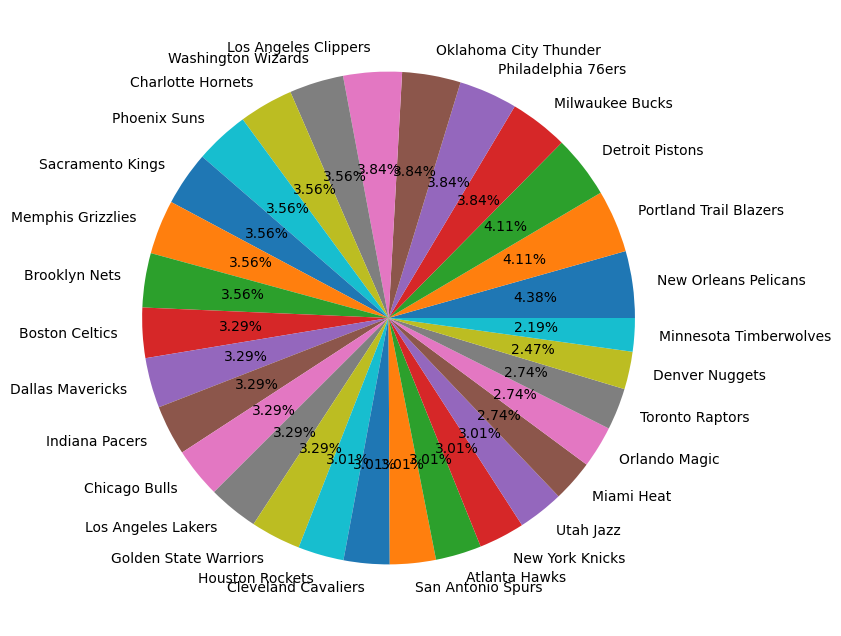

In [58]:
plt.figure(figsize=(8, 8))
plt.pie(percentage_splitting,labels=df.Team.value_counts().index,autopct='%1.2f%%')

### 2.Segregate the employees w.r.t different positions.

In [189]:
df.Position.unique()

array(['PG', 'SF', 'SG', 'PF', 'C'], dtype=object)

In [190]:
df.Position.value_counts()

Position
SG    87
PF    81
PG    76
SF    71
C     50
Name: count, dtype: int64

In [75]:
Position=df.groupby('Position')
for Position in Position:
        print(Position)
        print("****************************************************************************************************************")

('C',                     Name                    Team  Number Position  Age  \
7           Kelly Olynyk          Boston Celtics      41        C   25   
10       Jared Sullinger          Boston Celtics       7        C   24   
14          Tyler Zeller          Boston Celtics      44        C   26   
23           Brook Lopez           Brooklyn Nets      11        C   28   
27            Henry Sims           Brooklyn Nets      14        C   26   
38           Robin Lopez         New York Knicks       8        C   28   
49           Joel Embiid      Philadelphia 76ers      21        C   22   
56         Jahlil Okafor      Philadelphia 76ers       8        C   20   
78          Andrew Bogut   Golden State Warriors      12        C   31   
81          Festus Ezeli   Golden State Warriors      31        C   26   
88     Marreese Speights   Golden State Warriors       5        C   28   
91          Cole Aldrich    Los Angeles Clippers      45        C   27   
98        DeAndre Jordan    Los 

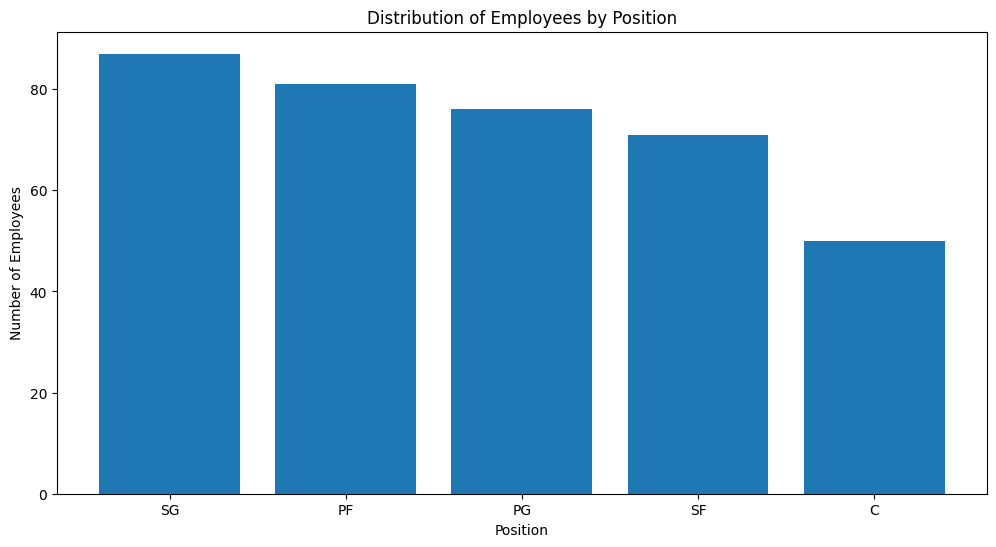

In [191]:
position_counts = df['Position'].value_counts()

# Plotting a bar chart
plt.figure(figsize=(12, 6))
plt.bar(position_counts.index, position_counts.values)
plt.xlabel('Position')
plt.ylabel('Number of Employees')
plt.title('Distribution of Employees by Position')
plt.show()

### 3.Find from which age group most of the employees belong to.

In [192]:
df.Age.value_counts()

Age
25    42
24    41
27    35
23    33
26    32
28    27
22    23
30    20
29    17
31    17
20    15
21    14
36     9
32     9
33     8
35     7
34     7
38     3
19     2
40     2
37     1
39     1
Name: count, dtype: int64

In [193]:
df.Age.value_counts().head(1)

Age
25    42
Name: count, dtype: int64

##### Most of the employees belong to the age  25.There are 42 employees in this group

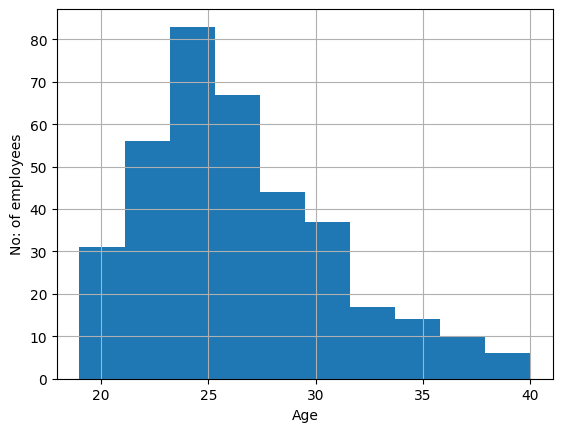

In [194]:
plt.hist(df.Age)
plt.xlabel("Age")
plt.ylabel("No: of employees")
plt.grid(True)

#### Most of the employees belong to the age group20-25

#### 4.Find out under which team and position, spending in terms of salary is high.

In [195]:
position=df[['Team','Position','Salary']].groupby(['Team','Position'])
for position in position:
    print(position)

(('Atlanta Hawks', 'C'),               Team Position      Salary
312  Atlanta Hawks        C  12000000.0)
(('Atlanta Hawks', 'PF'),               Team Position      Salary
313  Atlanta Hawks       PF   1000000.0
315  Atlanta Hawks       PF  18671659.0
316  Atlanta Hawks       PF    947276.0
319  Atlanta Hawks       PF   3333333.0)
(('Atlanta Hawks', 'PG'),               Team Position     Salary
323  Atlanta Hawks       PG  8000000.0)
(('Atlanta Hawks', 'SF'),               Team Position     Salary
309  Atlanta Hawks       SF  2000000.0)
(('Atlanta Hawks', 'SG'),               Team Position     Salary
310  Atlanta Hawks       SG  1304520.0
311  Atlanta Hawks       SG  2854940.0
314  Atlanta Hawks       SG  5746479.0
317  Atlanta Hawks       SG   525093.0)
(('Boston Celtics', 'C'),               Team Position     Salary
7   Boston Celtics        C  2165160.0
10  Boston Celtics        C  2569260.0
14  Boston Celtics        C  2616975.0)
(('Boston Celtics', 'PF'),              Team Positio

In [196]:
groups=df[['Team','Position','Salary']].groupby(['Team','Position']).Salary.sum()
groups

Team                Position
Atlanta Hawks       C           12000000.0
                    PF          23952268.0
                    PG           8000000.0
                    SF           2000000.0
                    SG          10431032.0
                                   ...    
Washington Wizards  C             273038.0
                    PF          11300000.0
                    PG          18022415.0
                    SF          11158800.0
                    SG          11356992.0
Name: Salary, Length: 142, dtype: float64

In [197]:
groups.sort_values(ascending=False)

Team                  Position
Miami Heat            PF          30591395.0
Houston Rockets       SG          28122883.0
Phoenix Suns          PG          28002998.0
Cleveland Cavaliers   PF          27882029.0
New Orleans Pelicans  SG          27489643.0
                                     ...    
Miami Heat            C             981348.0
Cleveland Cavaliers   SF            947276.0
Orlando Magic         SF            845059.0
Milwaukee Bucks       SF            295327.0
Washington Wizards    C             273038.0
Name: Salary, Length: 142, dtype: float64

In [198]:
groups.sort_values(ascending=False).head(1)

Team        Position
Miami Heat  PF          30591395.0
Name: Salary, dtype: float64

#### Team  Miami Heat on Position PF  spends high on salary          

### 5.Find if there is any correlation between age and salary , represent it visually.

In [199]:
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,158,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,154,235,Marquette,6796117.0
3,R.J. Hunter,Boston Celtics,28,SG,22,151,185,Georgia State,1148640.0
6,Jordan Mickey,Boston Celtics,55,PF,21,170,235,LSU,1170960.0
7,Kelly Olynyk,Boston Celtics,41,C,25,153,238,Gonzaga,2165160.0
...,...,...,...,...,...,...,...,...,...
451,Chris Johnson,Utah Jazz,23,SF,26,161,206,Dayton,981348.0
452,Trey Lyles,Utah Jazz,41,PF,20,153,234,Kentucky,2239800.0
453,Shelvin Mack,Utah Jazz,8,PG,26,171,203,Butler,2433333.0
456,Jeff Withey,Utah Jazz,24,C,26,170,231,Kansas,947276.0


In [200]:
corr=df[['Age','Salary']].corr()

In [201]:
df['Age'].corr(df['Salary'])

0.15999189342806175

Text(0.5, 1.0, 'Age-Salary correlation')

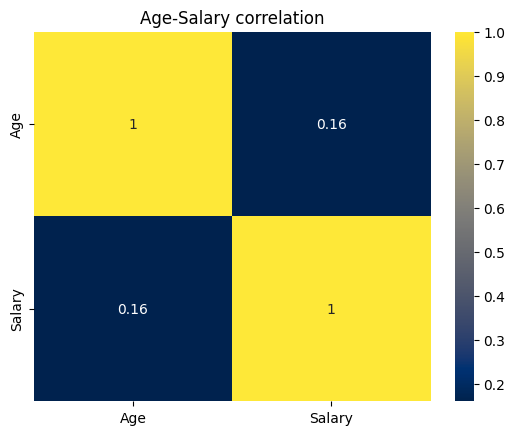

In [206]:
sns.heatmap(corr,annot=True,cmap='cividis')
plt.title("Age-Salary correlation")

#### the correlation coefficient between the 'Age' and 'Salary' is 0.16